In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\Desktop\simulacion_3\\Notebooks\data_latinoamerica.csv')

In [3]:
df = df[df['location_key'] == 'AR']

In [5]:
df.head(20)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
5,AR,2020-01-06,AR,Argentina,9.0,0.0,41.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
6,AR,2020-01-07,AR,Argentina,4.0,0.0,45.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
7,AR,2020-01-08,AR,Argentina,3.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
8,AR,2020-01-09,AR,Argentina,0.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
9,AR,2020-01-10,AR,Argentina,1.0,0.0,49.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [4]:
# Identificar las columnas que contienen valores 0
columns_with_zeros = df.columns[(df == 0).any()]

# Mostrar las columnas y las filas con valores 0
for column in columns_with_zeros:
    zero_rows = df[df[column] == 0]
    print(f"Column '{column}' has zero values in the following rows:")
    print(zero_rows)

# Alternativamente, para ver solo las columnas que tienen valores 0
print("Columns with zero values:", columns_with_zeros.tolist())

Column 'new_confirmed' has zero values in the following rows:
    location_key        date country_code country_name  new_confirmed  \
8             AR  2020-01-09           AR    Argentina            0.0   
10            AR  2020-01-11           AR    Argentina            0.0   
12            AR  2020-01-13           AR    Argentina            0.0   
13            AR  2020-01-14           AR    Argentina            0.0   
15            AR  2020-01-16           AR    Argentina            0.0   
..           ...         ...          ...          ...            ...   
981           AR  2022-09-08           AR    Argentina            0.0   
983           AR  2022-09-10           AR    Argentina            0.0   
984           AR  2022-09-11           AR    Argentina            0.0   
985           AR  2022-09-12           AR    Argentina            0.0   
986           AR  2022-09-13           AR    Argentina            0.0   

     new_deceased  cumulative_confirmed  cumulative_deceased 

### Contar cuantos valores Nulos tiene cada columna

In [5]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              4
new_deceased                               4
cumulative_confirmed                       4
cumulative_deceased                        4
cumulative_vaccine_doses_administered    367
average_temperature_celsius                6
minimum_temperature_celsius                6
maximum_temperature_celsius                6
rainfall_mm                                6
relative_humidity                          6
new_recovered                            991
cumulative_recovered                     991
dtype: int64


### Contar cuantos 0 tiene cada columna

In [6]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 123 rows with zero values.
Column 'new_deceased' has 165 rows with zero values.
Column 'cumulative_confirmed' has 9 rows with zero values.
Column 'cumulative_deceased' has 43 rows with zero values.
Column 'rainfall_mm' has 638 rows with zero values.

Counts of zero values per column: {'new_confirmed': 123, 'new_deceased': 165, 'cumulative_confirmed': 9, 'cumulative_deceased': 43, 'rainfall_mm': 638}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [7]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_ar = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [8]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_ar.drop(columns=columns_to_drop, inplace=True)


C:\Users\Kuma\AppData\Local\Temp\ipykernel_9744\1885796363.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar.drop(columns=columns_to_drop, inplace=True)


In [15]:
df_ar.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
62,AR,2020-03-03,AR,Argentina,1.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,25.236111,51.935532,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
63,AR,2020-03-04,AR,Argentina,0.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,25.902778,55.996293,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
64,AR,2020-03-05,AR,Argentina,0.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,26.173611,54.477409,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
65,AR,2020-03-06,AR,Argentina,7.0,0.0,NaN,44938712.0,19523766.0,20593330.0,...,26.194444,57.374758,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
66,AR,2020-03-07,AR,Argentina,1.0,1.0,NaN,44938712.0,19523766.0,20593330.0,...,26.819444,52.838146,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [9]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_ar.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    363
average_temperature_celsius                2
relative_humidity                          2
dtype: int64


In [10]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_ar.columns[(df_ar == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_ar[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 112 rows with zero values.
Column 'new_deceased' has 154 rows with zero values.

Counts of zero values per column: {'new_confirmed': 112, 'new_deceased': 154}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [11]:
# Imputación con la media para columnas específicas
df_ar['average_temperature_celsius'] = df_ar['average_temperature_celsius'].fillna(df_ar['average_temperature_celsius'].mean())
df_ar['relative_humidity'] = df_ar['relative_humidity'].fillna(df_ar['relative_humidity'].mean())


C:\Users\Kuma\AppData\Local\Temp\ipykernel_9744\1463903059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['average_temperature_celsius'] = df_ar['average_temperature_celsius'].fillna(df_ar['average_temperature_celsius'].mean())
C:\Users\Kuma\AppData\Local\Temp\ipykernel_9744\1463903059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['relative_humidity'] = df_ar['relative_humidity'].fillna(df_ar['relative_humidity'].mean())


In [12]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-17'
fecha_limite = '2020-12-29'
df_ar.loc[df['date'] < fecha_limite] = df_ar.loc[df['date'] < fecha_limite].fillna(0)

In [13]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 123 rows with zero values.
Column 'new_deceased' has 165 rows with zero values.
Column 'cumulative_confirmed' has 9 rows with zero values.
Column 'cumulative_deceased' has 43 rows with zero values.
Column 'rainfall_mm' has 638 rows with zero values.

Counts of zero values per column: {'new_confirmed': 123, 'new_deceased': 165, 'cumulative_confirmed': 9, 'cumulative_deceased': 43, 'rainfall_mm': 638}


In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ar.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,9905.94,133.18,20682192.62,44938712.00,19523766.00,20593330.00,16.51,0.82,6718871.00,7045513.00,...,17.65,56.19,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
std,19475.29,155.13,32128263.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.29,14.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,3.43,23.42,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
25%,605.75,8.00,0.00,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,12.44,46.47,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
50%,4374.50,73.00,3682769.50,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,17.73,55.79,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
75%,11440.25,214.00,30931468.25,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,22.83,65.73,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
max,174174.00,656.00,109007243.00,44938712.00,19523766.00,20593330.00,16.52,0.82,6718871.00,7045513.00,...,33.09,94.58,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80


In [16]:
#calcular columna vacunas administradas por dia
g=df_ar.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_ar['vaccine_doses_administered_for_day']=h

df_ar.vaccine_doses_administered_for_day.max()

C:\Users\Kuma\AppData\Local\Temp\ipykernel_9744\3318409426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['vaccine_doses_administered_for_day']=h


68283695.0

In [17]:
df_ar.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

C:\Users\Kuma\AppData\Local\Temp\ipykernel_9744\2539937851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar.drop(columns='cumulative_vaccine_doses_administered', inplace=True)


In [24]:
# Crear la columna del acumulado de vacunas diarias
df_ar['cumulative_vaccine_doses_administered'] = df_ar['vaccine_doses_administered_for_day'].cumsum()

col = list(df_ar.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_ar = df_ar[col]
df_ar

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,cumulative_vaccine_doses_administered,population,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2020-01-01,AR,Argentina,3.00,0.00,0.00,0.00,44938712.00,19523766.00,...,23.50,64.43,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
1,AR,2020-01-02,AR,Argentina,14.00,0.00,0.00,0.00,44938712.00,19523766.00,...,23.69,65.07,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
2,AR,2020-01-03,AR,Argentina,3.00,0.00,0.00,0.00,44938712.00,19523766.00,...,25.19,59.67,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
3,AR,2020-01-04,AR,Argentina,7.00,0.00,0.00,0.00,44938712.00,19523766.00,...,26.31,53.49,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
4,AR,2020-01-05,AR,Argentina,5.00,0.00,0.00,0.00,44938712.00,19523766.00,...,25.89,57.13,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,AR,2022-08-27,AR,Argentina,0.00,0.00,7091.00,39185092.00,44938712.00,19523766.00,...,15.93,36.74,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
970,AR,2022-08-28,AR,Argentina,0.00,0.00,3009.00,39188101.00,44938712.00,19523766.00,...,9.09,34.53,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
971,AR,2022-08-29,AR,Argentina,0.00,0.00,31697.00,39219798.00,44938712.00,19523766.00,...,10.31,32.64,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
972,AR,2022-08-30,AR,Argentina,0.00,0.00,29380.00,39249178.00,44938712.00,19523766.00,...,12.35,33.48,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80


In [23]:
col = list(df_ar.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_ar = df_ar[col]
df_ar

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2020-01-01,AR,Argentina,3.00,0.00,0.00,44938712.00,0.00,19523766.00,...,23.50,64.43,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
1,AR,2020-01-02,AR,Argentina,14.00,0.00,0.00,44938712.00,0.00,19523766.00,...,23.69,65.07,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
2,AR,2020-01-03,AR,Argentina,3.00,0.00,0.00,44938712.00,0.00,19523766.00,...,25.19,59.67,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
3,AR,2020-01-04,AR,Argentina,7.00,0.00,0.00,44938712.00,0.00,19523766.00,...,26.31,53.49,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
4,AR,2020-01-05,AR,Argentina,5.00,0.00,0.00,44938712.00,0.00,19523766.00,...,25.89,57.13,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,AR,2022-08-27,AR,Argentina,0.00,0.00,7091.00,44938712.00,108913874.00,19523766.00,...,15.93,36.74,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
970,AR,2022-08-28,AR,Argentina,0.00,0.00,3009.00,44938712.00,108916883.00,19523766.00,...,9.09,34.53,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
971,AR,2022-08-29,AR,Argentina,0.00,0.00,31697.00,44938712.00,108948580.00,19523766.00,...,10.31,32.64,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80
972,AR,2022-08-30,AR,Argentina,0.00,0.00,29380.00,44938712.00,108977960.00,19523766.00,...,12.35,33.48,15057273.00,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80


In [25]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_ar['vaccine_doses_administered_for_day'].quantile(0.25)
Q3 = df_ar['vaccine_doses_administered_for_day'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_ar[(df_ar['vaccine_doses_administered_for_day'] >= lower_bound) & (df_ar['vaccine_doses_administered_for_day'] <= upper_bound)]

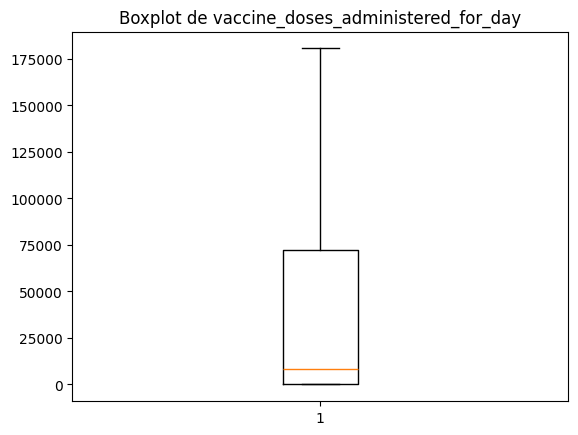

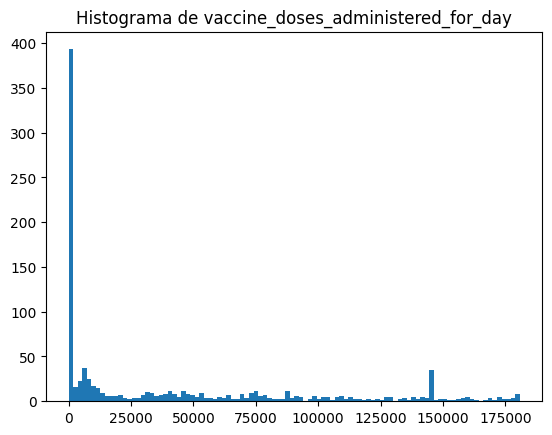

In [26]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [27]:
avg_vaccine = (upper_bound - lower_bound)/2

df_prueba = df_ar
# Reemplazar los valores por encima del valor máximo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound else x
)

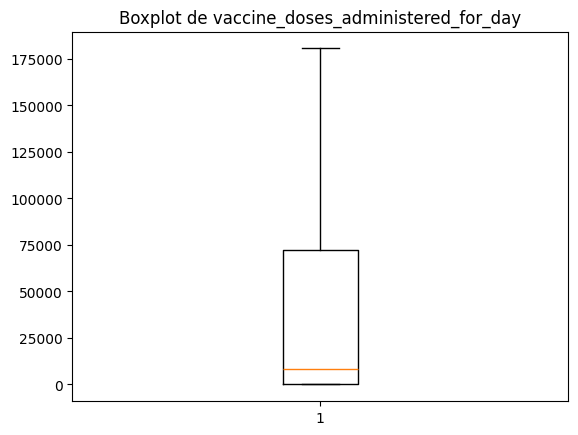

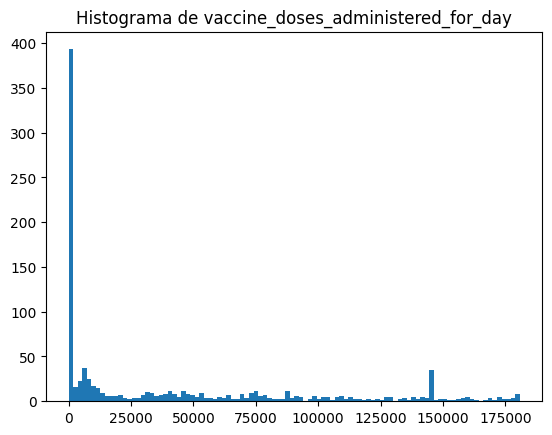

In [28]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_prueba['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_prueba['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [29]:
df_prueba.to_csv('data\processed\covid19_Argentina2.csv', index=False)
